In [1]:
import collections
import random

import pandas
import numpy

from curve_fits import Call, Spec

from curve_fits import curves
from curve_fits import frames

In [2]:
index = numpy.arange(0, 15, 0.2)
std = 40
frame = frames.FittingFrame({
    'second': [random.gauss(1 + x**2/2, std) for x in index],
    'third': [random.gauss(1 + x**2/2 - x**3/6, std) for x in index],
    'fourth': [random.gauss(1 + x**2/2 - x**3/6 + x**4/24, std) for x in index],
}, index=index)
frame.fit(second=[Call(Spec(curves.Polynomial, 3), Spec(curves.Xlog, 1, pole=-10))],
          third=[Call(Spec(curves.Polynomial, 4))],
          fourth=[Call(Spec(curves.Polynomial, 5))])

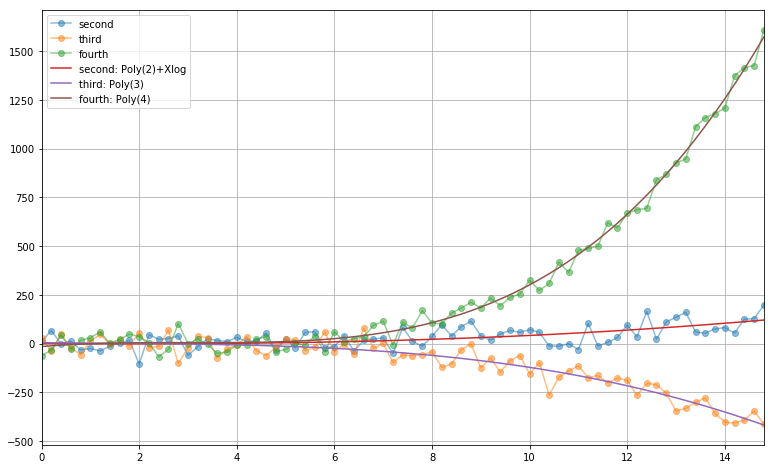

In [3]:
fig, ax = frame.plot(limit=None)

In [4]:
frame.best_fits(limit=1)

,,kind,fit,DOF
key,cost,,,
second,15.738187,Poly(2)+Xlog,(7E+2 ± 3.2E+3) + (1.0E+2 ± 4.7E+2)s + (1.7 ± ...,4
third,15.577295,Poly(3),(5 ± 20) + (-2 ± 11)s + (0.5 ± 1.8)s² + (-0.15...,4
fourth,14.032017,Poly(4),(-15 ± 23) + (20 ± 21)s + (-6.1 ± 5.9)s² + (0....,5


In [5]:
fit = frame._fits['second'].pop()

In [6]:
fit

<CurveFit: (7E+2 ± 3.2E+3) + (1.0E+2 ± 4.7E+2)s + (1.7 ± 4.1)s² + (-3E+1 ± 1.4E+2)s·log(s)>

In [7]:
fit.curve.curves

(<Polynomial: (688.1169400106656) + (97.58591546960058)s + (1.6751173341335026)s²>,
 <Xlog: (-29.868605559393345)s·log(s)>)